In [79]:
#working on time_series .py
#ARIMA Auto Regression - Integration - Moving Average
#AR amd MA is done either directly if series is stationary
#Else differencing or other methods are necessary before modeling a time series
#In final model difference are added back to get the actual values
#TSA can use either AR or MA alone or both together
#Whicever model gives the best t statistic will be used
#ACF and PACF analysis finds the t and p values for the parameters to be used
#Good model closely fits the observation when back tested and does a good job of predicting values
#Given the environment/assumptions are not significantly cahnged
#Seasonality are taken care of by both - smoothening (averaging) and differencing and final model puts it back
#Random errors are the keys - Most modeling is done to minimize random errors
#Random errors by definition - has normal distribution, 0 mean and constant variance - called the white noise

In [80]:
#imports
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
#reading the file to woek with and making appropriate shaping and cleaning
#TSA - is all about time - hence date/time column will be index column
#curric-data-001-data-sets/loans/LoanStats3b.csv.zip
loansData = pd.read_csv('C:\\Users\\Mnsh\\Documents\\GitHub\\TSA\\LoanStats3b_new.csv', header=1, low_memory=False)
#loansData.issue_d.head()
loansData['issue_d_format']=pd.to_datetime(loansData['issue_d'])
#loansData['issue_d_format'] working
loansData_ts=loansData.set_index('issue_d_format')
year_month_summary=loansData_ts.groupby(lambda x : x.year*100 + x.month).count()
loan_count_summary=year_month_summary['issue_d']



In [82]:
loan_count_summary

201601.0     9474
201602.0    10121
201603.0    11187
201604.0    12649
201605.0    13750
201606.0    14716
201607.0    16537
201608.0    18093
201609.0    19074
201610.0    20378
201611.0    21058
201612.0    21086
Name: issue_d, dtype: int64

In [83]:
#year_month_summary

In [84]:
#loansData['issue_d_format']

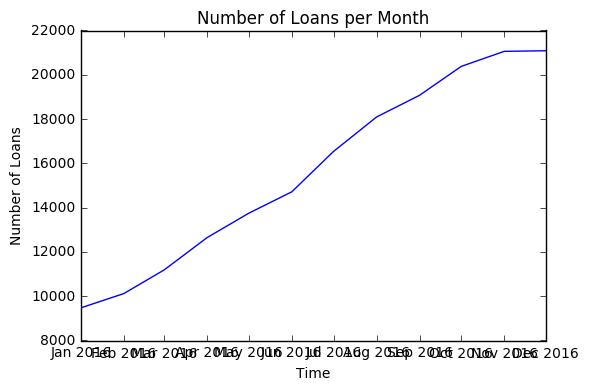

In [85]:
#Plot time-series
loan_time = [datetime.strptime(str(int(x)), "%Y%m") for x in loan_count_summary.index]

plt.plot(loan_time,loan_count_summary.values)
plt.title('Number of Loans per Month')
plt.xlabel('Time')
plt.ylabel('Number of Loans')

In [86]:
loan_time

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 2, 1, 0, 0),
 datetime.datetime(2016, 3, 1, 0, 0),
 datetime.datetime(2016, 4, 1, 0, 0),
 datetime.datetime(2016, 5, 1, 0, 0),
 datetime.datetime(2016, 6, 1, 0, 0),
 datetime.datetime(2016, 7, 1, 0, 0),
 datetime.datetime(2016, 8, 1, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 10, 1, 0, 0),
 datetime.datetime(2016, 11, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0)]

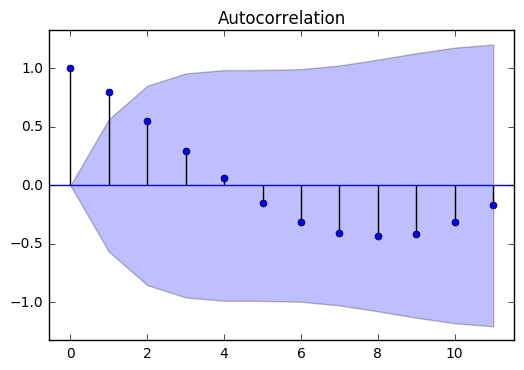

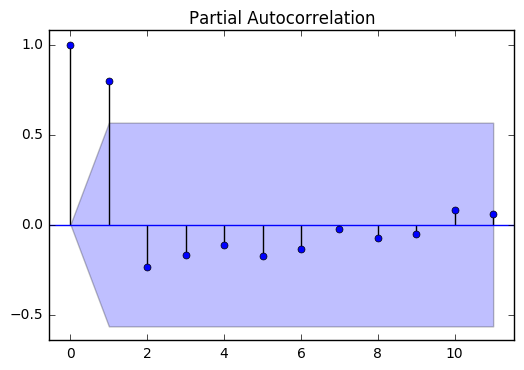

In [87]:
#example from https://github.com/briansorahan/thinkful-data-science/blob/master/time_series.py
#Here the Auto correlation is time dependant ie shows significant seasonality implying non - stationary nature of data
#However partial AR pattern is not obvious
#tsaplots has simpler syntax
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(loan_count_summary)
tsaplots.plot_pacf(loan_count_summary)
plt.show()

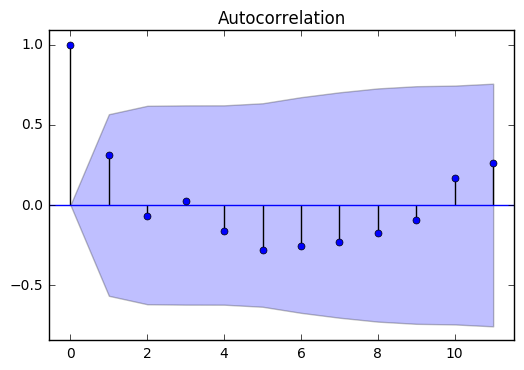

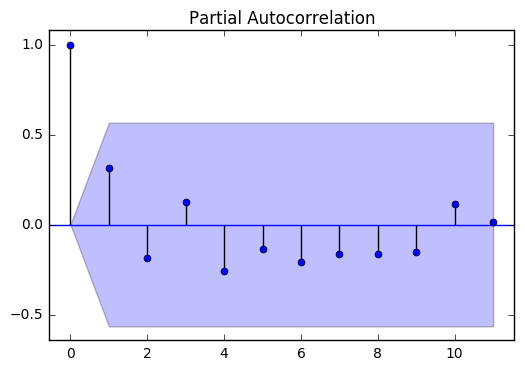

In [88]:
#Inbuilt method for differencing, does .values(x) - .values (x-1)
#tsaplots is utilized here
#?AR and partial AR constant, Autocorrelation still shows time dependant pattern but degree of correlation is low
#Does this mean further smoothening is desired? t test is not done on data
#PACF looks better
loan_count_summary_diff = loan_count_summary.diff()
loan_count_summary_diff = loan_count_summary_diff.fillna(0) #the first one is substitute with 0 to retain shape
tsaplots.plot_acf(loan_count_summary_diff)  
tsaplots.plot_pacf(loan_count_summary_diff)
plt.show()


In [89]:
loan_count_summary_diff.head()

201601.0       0.0
201602.0     647.0
201603.0    1066.0
201604.0    1462.0
201605.0    1101.0
Name: issue_d, dtype: float64

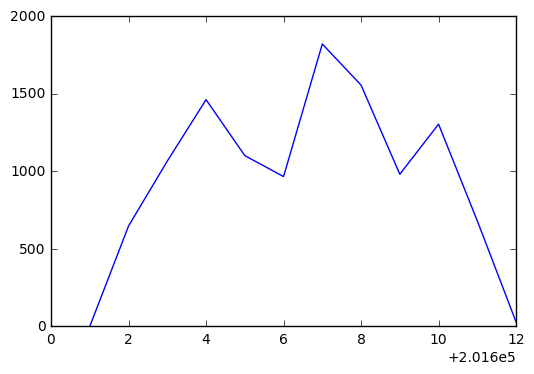

In [90]:
#the plot just shows the trend and it not specifically plotted against loan_time(time line)
#The figure appears to be stationary but not value is calculated and hence difficult to be sure
plt.plot(loan_count_summary_diff)


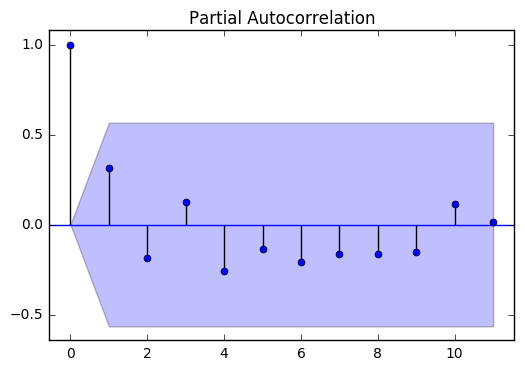

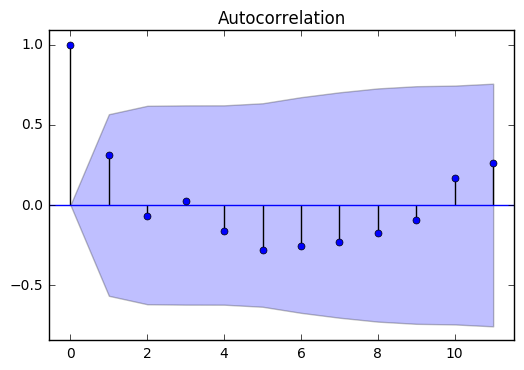

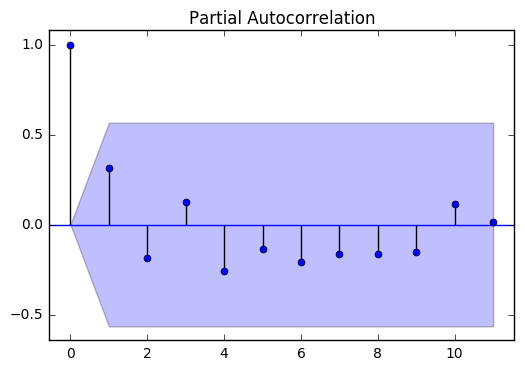

In [91]:
#same plot of acf and pacf of the difference with different syntax
sm.graphics.tsa.plot_acf(loan_count_summary_diff)  
sm.graphics.tsa.plot_pacf(loan_count_summary_diff)


In [92]:
#differencing??
#takes care of seasonality  
#calculate x_i+1 - x_i to make it stationary
#Actually gives the same set of values as loan_count_summary.diff
diff_loan_count=[]
i = 1
while i < len(loan_count_summary.values):
    diff_loan_count.append(loan_count_summary.values[i]-loan_count_summary.values[i-1])
    i+=1
diff_loan_count[0:5]

[647, 1066, 1462, 1101, 966]

In [94]:
#mov_avg=pd.rolling_mean(loan_count_summary, 5)
#mov_avg=loan_count_summary.rolling(window=5,center=False).mean()
moving_mean = pd.rolling_mean(loan_count_summary.values, window=5)  #.shift(-2)
#print(mmoving_mean)
moving_mean_diff=loan_count_summary.values-moving_mean
moving_mean_diff[0:8]

C:\Users\Mnsh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


array([    nan,     nan,     nan,     nan,  2313.8,  2231.4,  2769.2,
        2944. ])

C:\Users\Mnsh\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\Mnsh\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


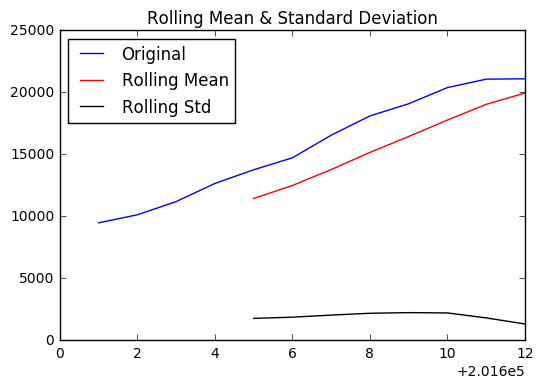

Results of Dickey-Fuller Test:
Test Statistic                -0.524740
p-value                        0.887098
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (5%)           -3.477583
Critical Value (1%)           -4.938690
Critical Value (10%)          -2.843868
dtype: float64


In [95]:
#Finding out moving average, std(or var) and calculating t statistic using fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #plt.plot(timeseries.rolling_mean(window=12,center=False).mean())
    #plt.plot(rolling_mean(timeseries))

    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(loan_count_summary)


In [97]:
#test_stationarity(moving_mean_diff)   fuller test values are not coming probably due to NaN values


In [ ]:
#the model is incomplete - and MA is not used, model is not rebuilt and tested
#Need to look up more on formating, indexing of time and grouping
#helpful examples at silkaitis-Thinkful
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/     Most helpful site for py tsa
#https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/   in R  good article
#http://earthpy.org/pandas-basics.html